<a href="https://colab.research.google.com/github/arunmozhidevan/MDS271-Machine-Learning/blob/main/LAB_3_Prediction_of_Numeric_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 3 - Prediction of Numeric Values
<hr/>

Submitted by <br>
Name: **Arun Mozhi Devan** <br>
Register Number: **21122009** <br>
Class: **MSCDS 2** <br> 
<hr/>


The attached dataset has rent details of some houses in Lavasa.

In [167]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from scipy import stats as st
from pprint import pprint

## Use Pandas to Import the Dataset

In [168]:
data = pd.read_csv('/content/HousePrices - Lab3.csv')
data

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0


## Do the necessary Exploratory Data Analysis

In [169]:
data['Location'] = ['Portofino' if 'Portofino' in i else i for i in data['Location']]

In [170]:
attr = dict() # categories of each qualitative attribute
for i in ['BuildingType', 'Location', 'Size']:
  attr.update({i:data[i].unique()})
attr

{'BuildingType': array(['Minimum Budget Rooms', 'Semi Furnished Single Room',
        'Semi Furnished Flat', 'Fully Furnished Single Room',
        'Super Furnished Single Room', 'Semi Furnished Villa',
        'Fully Furnished Flat', 'Super Furnished Flat',
        'Fully Furnished Villa', 'Super Furnished Villa'], dtype=object),
 'Location': array(['Portofino', 'School Street', 'Clubview Road', 'Starter Homes'],
       dtype=object),
 'Size': array(['1 BHK', '2 BHK', '1 RK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
        '8 BHK', '7 BHK', '9 BHK'], dtype=object)}

In [171]:
data.dtypes # data type of each column

BuildingType     object
Location         object
Size             object
AreaSqFt        float64
NoOfBath          int64
NoOfPeople        int64
NoOfBalcony       int64
RentPerMonth    float64
dtype: object

In [172]:
data.columns # columms in the data set

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

In [173]:
data.describe() # describtionlike mean, min, max & standard deviation

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [174]:
data.corr()['RentPerMonth'] # correlation with respect to RentPerMonth    

AreaSqFt        0.473022
NoOfBath        0.579693
NoOfPeople      0.782853
NoOfBalcony     0.193619
RentPerMonth    1.000000
Name: RentPerMonth, dtype: float64

In [175]:
pd.pivot_table(data, values=['AreaSqFt', 'RentPerMonth'], index=['BuildingType','Location'], aggfunc={'AreaSqFt': np.mean,
                             'RentPerMonth': ['min', 'max', np.mean]}) # pivot table

AreaSqFt RentPerMonth  \
                                                  mean          max   
BuildingType                Location                                  
Fully Furnished Flat        Clubview Road  2547.500000      37500.0   
                            Portofino      2614.533333      37500.0   
                            School Street  2558.333333      32500.0   
Fully Furnished Single Room Clubview Road  1448.500000      11100.0   
                            Portofino      1465.412844      11500.0   
                            School Street  1480.950000      11100.0   
Fully Furnished Villa       Clubview Road  3834.666667      54850.0   
                            Portofino      2935.083333      49900.0   
                            School Street  2440.000000      42500.0   
Minimum Budget Rooms        Clubview Road   960.885714       5000.0   
                            Portofino       951.036145       5191.0   
                            School Street   981.375000       5040.0   
                            Starter Homes  1798.750000       4900.0   
Semi Furnished Flat         Clubview Road  1551.920000      16200.0   
                            Portofino      1797.840127      19000.0   
                            School Street  1420.891892      17000.0   
                            Starter Homes  2400.000000       6000.0   
Semi Furnished Single Room  Clubview Road  1109.543654       6377.0   
                            Portofino      1110.094972       6600.0   
                            School Street  1146.487179       6450.0   
                            Starter Homes  1395.500000       6100.0   
Semi Furnished Villa        Clubview Road  1836.227273      24700.0   
                            Portofino      2305.393939      24500.0   
                            School Street  1514.000000      23000.0   
Super Furnished Flat        Clubview Road  3428.000000      33000.0   
                            Portofino      3031.600000      33700.0   
                            School Street  1500.000000      32500.0   
Super Furnished Single Room Clubview Road  1694.375000      13400.0   
                            Portofino      1771.937500      13500.0   
                            School Street  2600.000000      12000.0   
Super Furnished Villa       Clubview Road  2668.333333      64000.0   
                            Portofino      4096.066667      96000.0   
                            School Street  4173.000000      80000.0   

                                                                  
                                                   mean      min  
BuildingType                Location                              
Fully Furnished Flat        Clubview Road  27868.750000  19800.0  
                            Portofino      25953.333333  19500.0  
                            School Street  25166.666667  20500.0  
Fully Furnished Single Room Clubview Road   8897.541667   7000.0  
                            Portofino       8948.486239   6930.0  
                            School Street   8615.300000   6900.0  
Fully Furnished Villa       Clubview Road  41341.666667  26200.0  
                            Portofino      33675.000000  26500.0  
                            School Street  42500.000000  42500.0  
Minimum Budget Rooms        Clubview Road   3749.885714   2300.0  
                            Portofino       3658.536145   1100.0  
                            School Street   3374.958333   1166.0  
                            Starter Homes   3708.000000   2300.0  
Semi Furnished Flat         Clubview Road   8974.100000   5568.0  
                            Portofino      10451.462025   5280.0  
                            School Street   8511.216216   5280.0  
                            Starter Homes   6000.000000   6000.0  
Semi Furnished Single Room  Clubview Road   4733.653846   1650.0  
                            Portofino       5026.064246   2000.0  
               

In [176]:
data.value_counts()

BuildingType                Location       Size   AreaSqFt  NoOfBath  NoOfPeople  NoOfBalcony  RentPerMonth
Semi Furnished Single Room  Portofino      2 BHK  1200.0    2         2           2            5200.0          3
                            School Street  2 BHK  1015.0    2         1           2            2588.0          2
                            Clubview Road  3 BHK  1464.0    3         2           2            5600.0          2
Semi Furnished Flat         School Street  2 BHK  1200.0    2         2           1            6500.0          2
Semi Furnished Single Room  School Street  1 BHK  645.0     1         1           1            1645.0          2
                                                                                                              ..
Minimum Budget Rooms        School Street  2 BHK  708.0     2         1           2            3700.0          1
                                                  800.0     1         1           1            2000.0

In [194]:
data_labled = data

In [220]:
le = dict()
for i in ['BuildingType', 'Location', 'Size']:
  le[i] = LabelEncoder()
  data_labled[i] = np.array(le[i].fit_transform(data_labled[i])).reshape(-1,1) 

In [192]:
le.inverse_transform([8])

array(['8 BHK'], dtype=object)

In [178]:
new_attr = dict()
for i in ['BuildingType', 'Location', 'Size']:
  new_attr.update({i:data[i].unique()})
new_attr

{'BuildingType': array([3, 5, 4, 1, 8, 6, 0, 7, 2, 9]),
 'Location': array([1, 2, 0, 3]),
 'Size': array([0, 2, 1, 3, 4, 5, 6, 8, 7, 9])}

In [179]:
attr['BuildingType'] = dict([(i,j) for i,j in zip(attr['BuildingType'],new_attr['BuildingType'])])

In [180]:
for i in ['BuildingType', 'Location', 'Size']:
  attr[i] = dict([(i,j) for i,j in zip(attr[i],new_attr[i])])

In [181]:
attr

{'BuildingType': {'Fully Furnished Flat': 0,
  'Fully Furnished Single Room': 1,
  'Fully Furnished Villa': 2,
  'Minimum Budget Rooms': 3,
  'Semi Furnished Flat': 4,
  'Semi Furnished Single Room': 5,
  'Semi Furnished Villa': 6,
  'Super Furnished Flat': 7,
  'Super Furnished Single Room': 8,
  'Super Furnished Villa': 9},
 'Location': {'Clubview Road': 0,
  'Portofino': 1,
  'School Street': 2,
  'Starter Homes': 3},
 'Size': {'1 BHK': 0,
  '1 RK': 1,
  '2 BHK': 2,
  '3 BHK': 3,
  '4 BHK': 4,
  '5 BHK': 5,
  '6 BHK': 6,
  '7 BHK': 7,
  '8 BHK': 8,
  '9 BHK': 9}}

## Use the train_test_split method available in SCIKIT to split the dataset into * Train Dataset and Test Dataset.


In [197]:
mms = MinMaxScaler()
data_transformed = mms.fit_transform(data_labled)

In [216]:
X_train, X_test, y_train, y_test = tts(data_labled.iloc[:,:-1], data_labled.iloc[:,-1], test_size=.4, random_state=4)

## Show the Regression Score, Intercept and other parameters etc in the Output


In [217]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print(f'Score: {lr.score(X_train, y_train)}\n Intercept: {lr.intercept_}')
pprint(f'Coefficient: {dict([(i,lr.coef_[j]) for i,j in zip(data.columns,range(len(data.columns)-1))])}')

Score: 0.7106426459704681
 Intercept: -13161.491014082108
("Coefficient: {'BuildingType': 821.7482882265765, 'Location': "
 "-160.72573653792412, 'Size': -587.214771740206, 'AreaSqFt': "
 "0.8054688371827012, 'NoOfBath': 2449.927961654973, 'NoOfPeople': "
 "6985.275489018609, 'NoOfBalcony': -347.9847368125499}")


In [218]:
# improving the accuracy using Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators= 150, min_samples_leaf=7)
gbr.fit(X_train, y_train)
yhat = gbr.predict(X_test)
gbr.score(X_train, y_train)

0.9662348990105873

## Use visualizations and plots wherever possible


In [232]:
data.drop(columns= ['AreaSqFt', 'RentPerMonth'])

,BuildingType,Location,Size,NoOfBath,NoOfPeople,NoOfBalcony
0,3,1,0,1,1,1
1,3,1,0,1,1,1
2,3,2,0,1,1,0
3,3,1,0,1,1,0
4,3,2,2,1,1,0
...,...,...,...,...,...,...
995,9,1,4,4,6,3
996,9,1,4,4,5,0
997,9,2,4,4,5,3
998,9,1,6,7,6,3


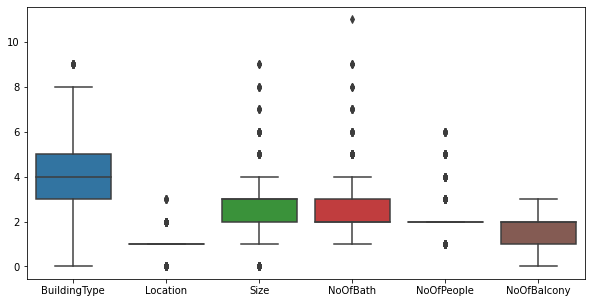

In [233]:
# plotting box plot to find outliers 
_, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data.drop(columns= ['AreaSqFt', 'RentPerMonth']), ax = ax)

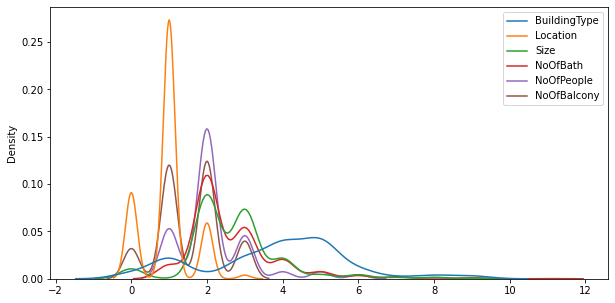

In [234]:
_, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=data.drop(columns= ['AreaSqFt', 'RentPerMonth']), ax = ax)

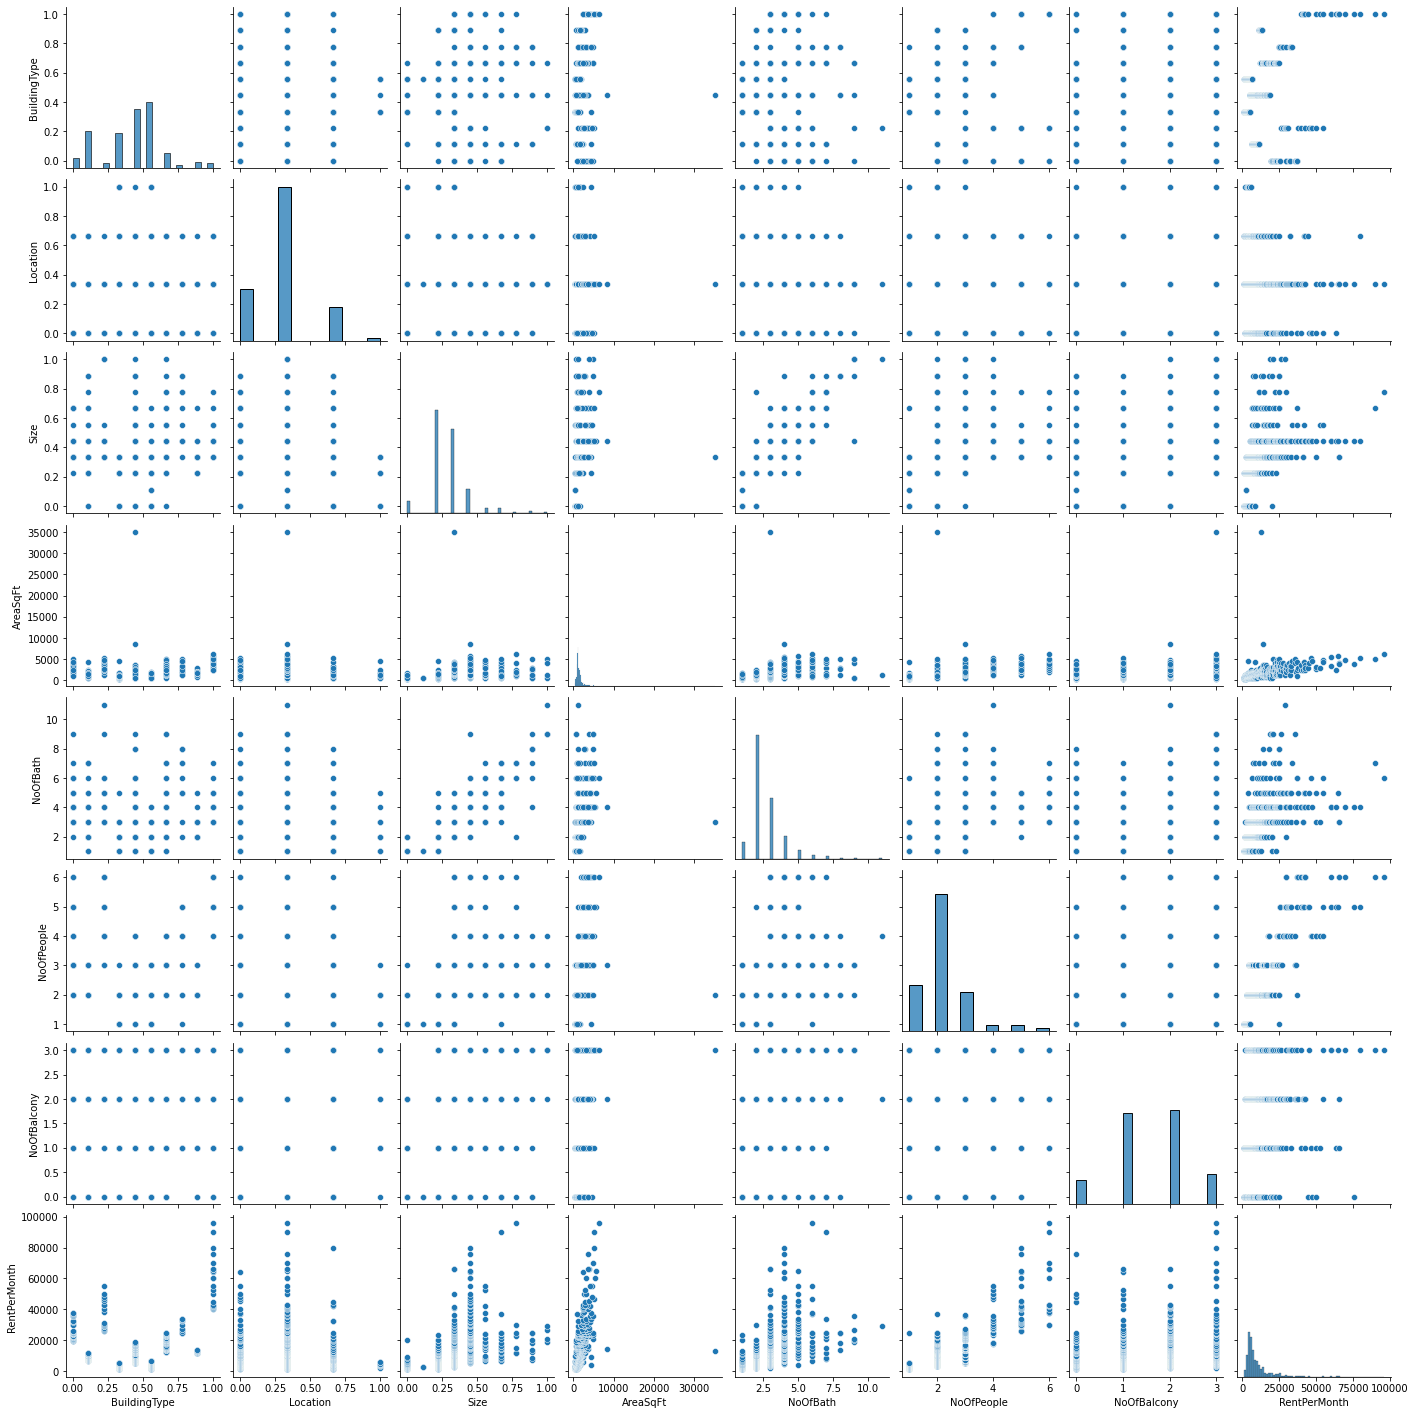

In [88]:
# pair plot to find relation between the attributes
sns.pairplot(data)

## Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab

# Questions


## 1. What are your observations on the Dataset?


NoOfPeople is one of the most important feature in finding RentPerMonth

## 2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?


In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score

In [90]:
mean_squared_error(y_test, yhat) # mean_squared_error

10221545.049308877

In [91]:
mean_absolute_error(y_test, yhat) # mean_absolute_error

1763.8906838934847

In [92]:
np.sqrt(mean_squared_error(y_test, yhat)) # root mean_squared_error

3197.115113552979

In [93]:
r2_score(y_test, yhat) # (coefficient of determination) regression score function.

0.9040121280215117

## 3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20


In [94]:
for i in range(2,6):
  X_train, X_test, y_train, y_test = tts(data.iloc[:,:-1], data.iloc[:,-1], test_size=i*.1, random_state=4)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  yhat = lr.predict(X_test)
  print(f'train-test ratio: {1-i*.1}:{i*.1} - {mean_squared_error(y_test, yhat, squared=False)}')

train-test ratio: 0.8:0.2 - 5753.992052739425
train-test ratio: 0.7:0.30000000000000004 - 5818.533084739802
train-test ratio: 0.6:0.4 - 5870.499121118333
train-test ratio: 0.5:0.5 - 5803.160924753228


## 4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

In [95]:
lr = LinearRegression(normalize=True, n_jobs=-1)
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(f'Score: {lr.score(X_train, y_train)}')

Score: 0.6931044264652537


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [96]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(f'Score: {lr.score(X_train, y_train)}')

Score: 0.6931044264652537


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

# Cases
Try to predict the rent of the below houses -
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa


Cases
Try to predict the rent of the below houses -
1. 1 BHK with 2 Baths in Portofino Street

In [199]:
data_transformed_df = pd.DataFrame(data_transformed)

In [210]:
values = [random.choice(data_transformed_df[i]) for i in range(8)]

[0.5555555555555556,
 0.3333333333333333,
 0.3333333333333333,
 0.014873646209386283,
 0.1,
 0.2,
 0.3333333333333333,
 0.08429926238145416]

In [212]:
values[4] = 0.1
values[2] = 0.0

In [215]:
gbr.predict([values[:-1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3621.91138065])

2. Fully Furnished 2 BHK in School Street

In [223]:
values = [random.choice(data_transformed_df[i]) for i in range(8)]

In [224]:
values[0] = 0.2222222222222222
values[2] = 0.2222222222222222

In [225]:
gbr.predict([values[:-1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([11399.57919254])


3. Single Room anywhere in Lavasa

In [226]:
values = [random.choice(data_transformed_df[i]) for i in range(8)]

In [227]:
values[2] = 0.1111111111111111

In [228]:
gbr.predict([values[:-1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([11399.57919254])